In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

C:\Users\banda\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


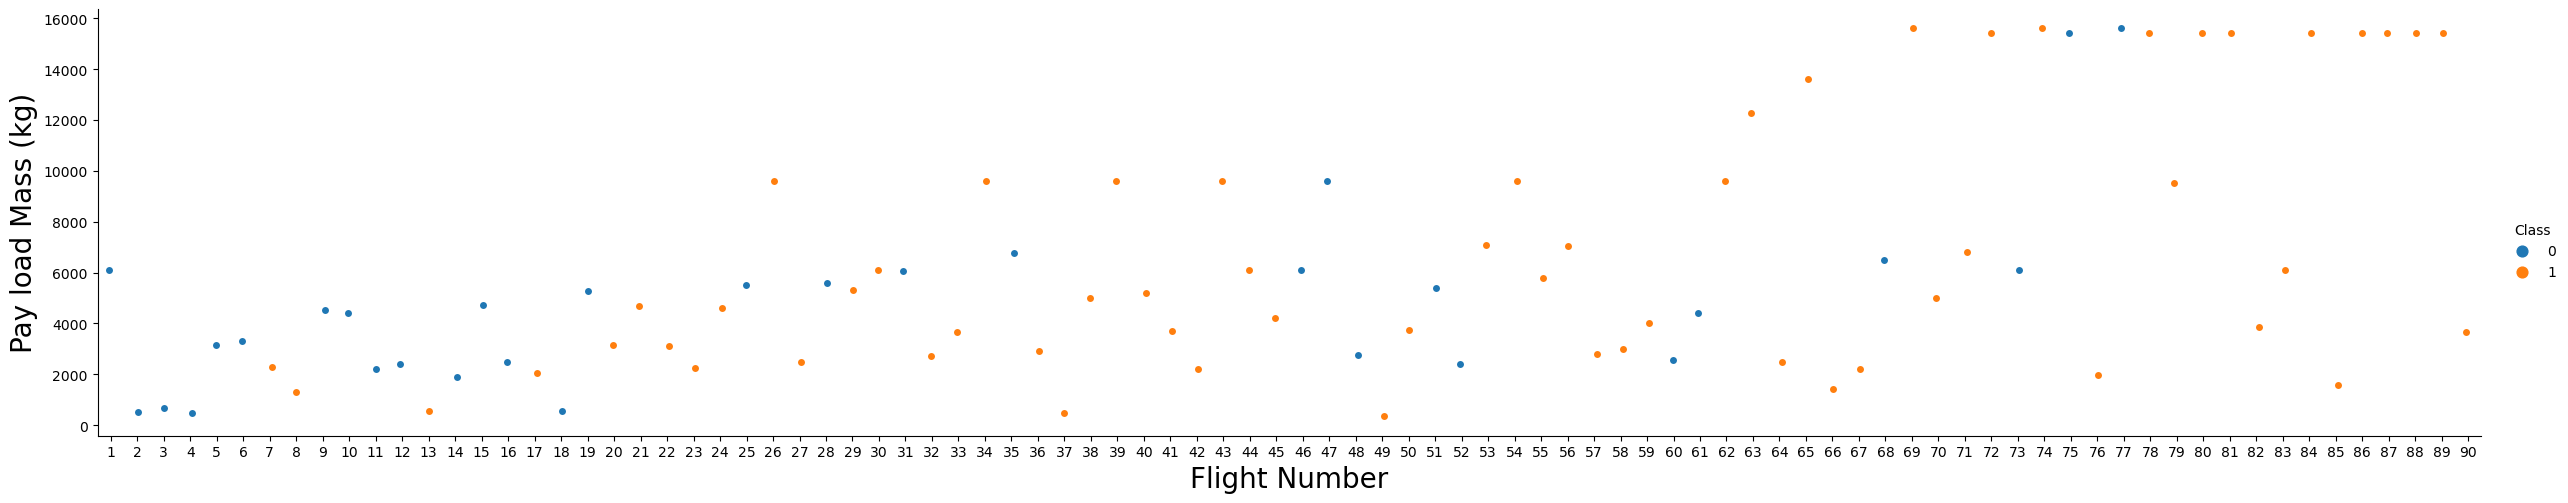

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

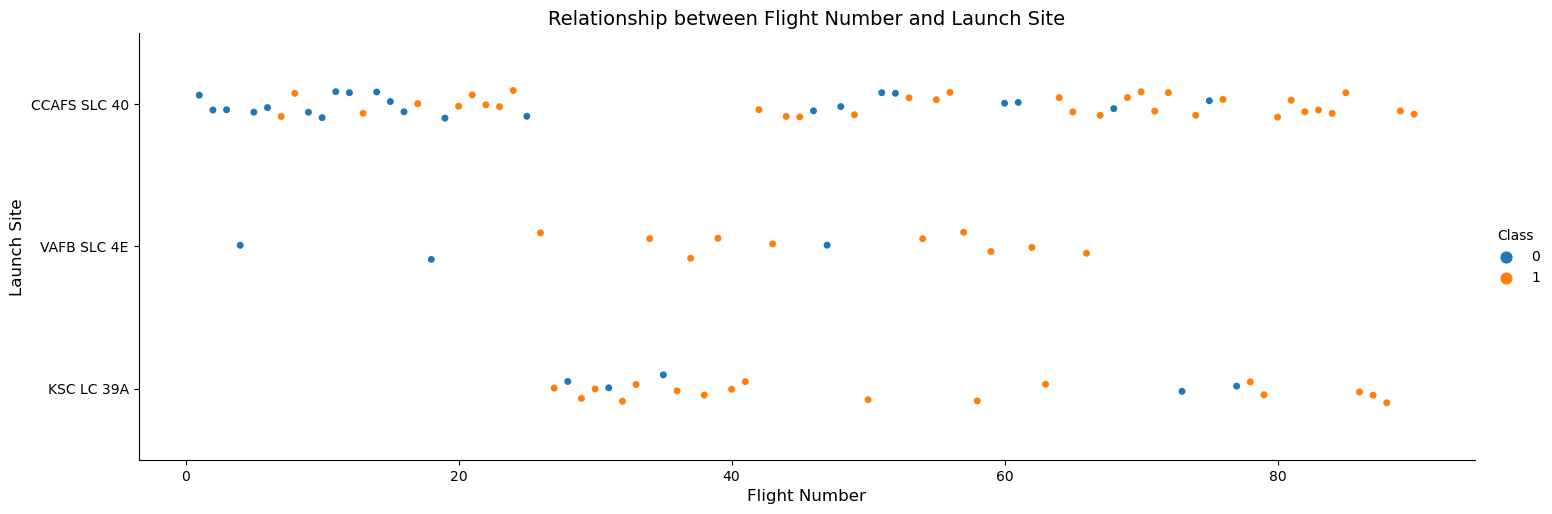

In [4]:
# Plot FlightNumber vs LaunchSite with hue='Class'
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=3)
plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Launch Site", fontsize=12)
plt.title("Relationship between Flight Number and Launch Site", fontsize=14)
plt.show()


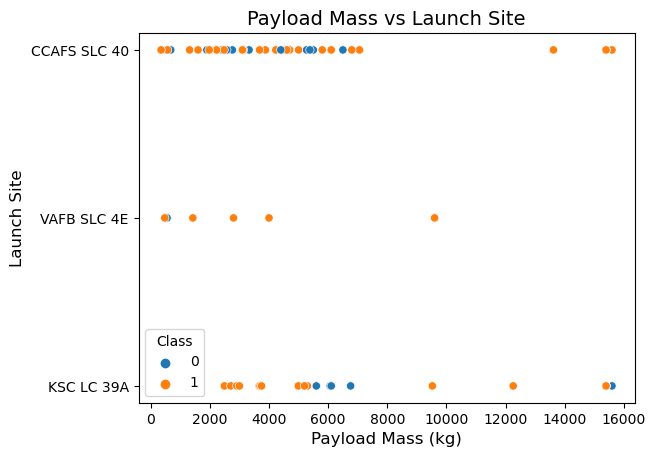

In [5]:
# Plot Payload Mass vs LaunchSite with hue='Class'
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Payload Mass (kg)", fontsize=12)
plt.ylabel("Launch Site", fontsize=12)
plt.title("Payload Mass vs Launch Site", fontsize=14)
plt.show()


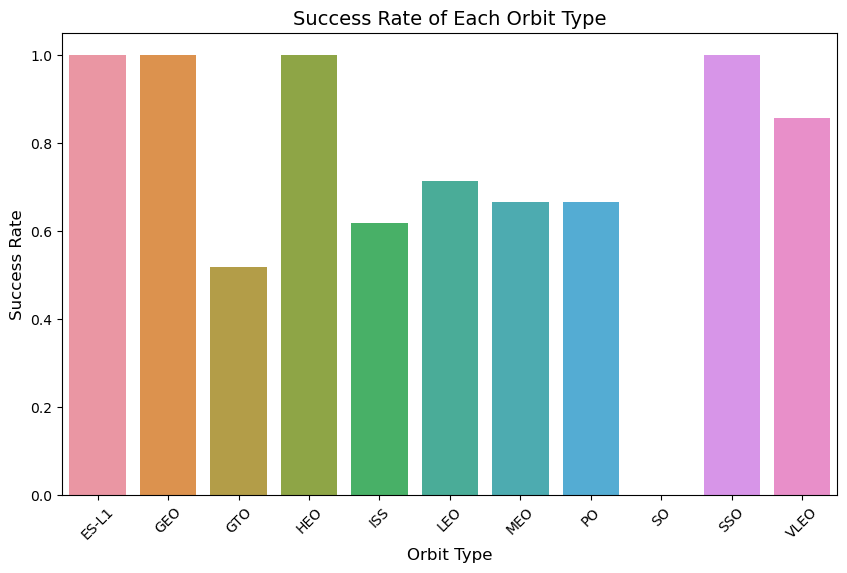

In [6]:
# Calculate success rate (mean of 'Class') for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)
plt.xlabel('Orbit Type', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.title('Success Rate of Each Orbit Type', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


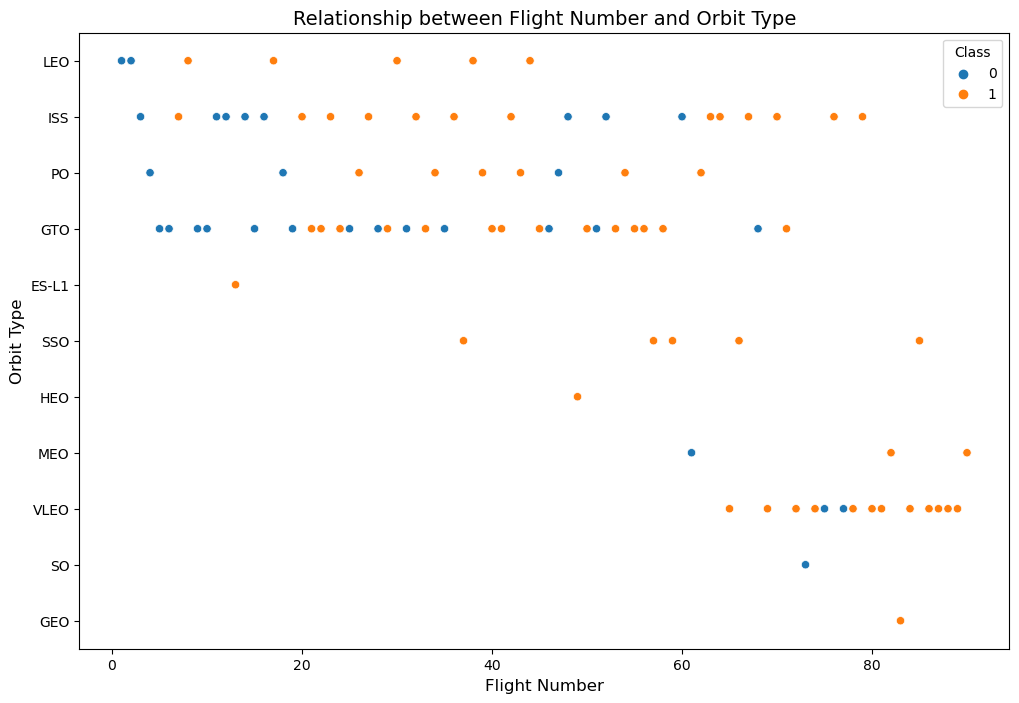

In [8]:
# Plot FlightNumber vs Orbit with hue='Class'
plt.figure(figsize=(12, 8))
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df)
plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Orbit Type", fontsize=12)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=14)
plt.legend(title='Class')
plt.show()


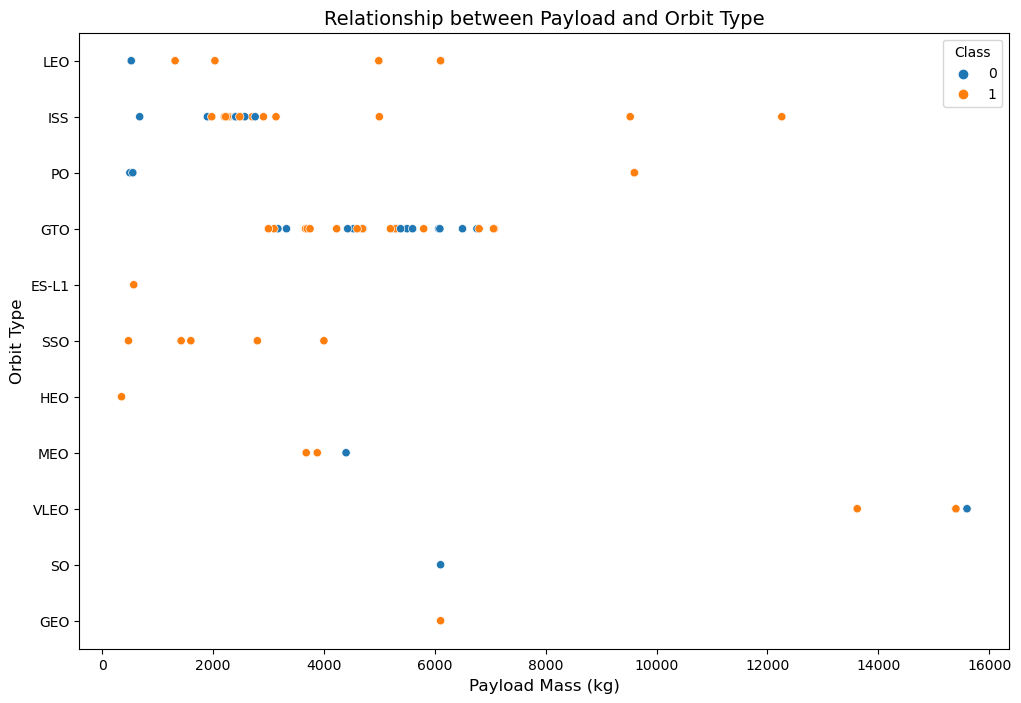

In [9]:
# Plot Payload vs Orbit with hue='Class'
plt.figure(figsize=(12, 8))
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.xlabel("Payload Mass (kg)", fontsize=12)
plt.ylabel("Orbit Type", fontsize=12)
plt.title("Relationship between Payload and Orbit Type", fontsize=14)
plt.legend(title='Class')
plt.show()


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

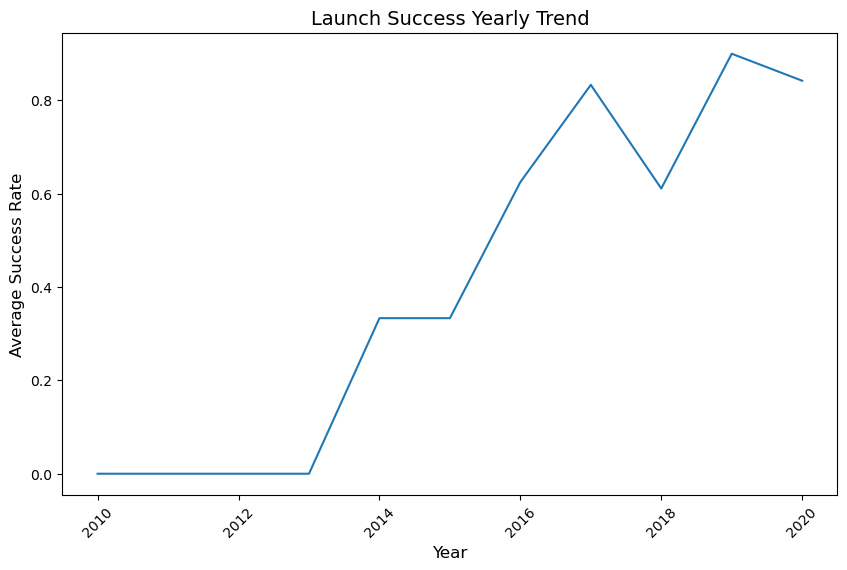

In [11]:
# Extract years from the date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate average success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=yearly_success_rate)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Success Rate', fontsize=12)
plt.title('Launch Success Yearly Trend', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [14]:
# Select categorical columns for one-hot encoding
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Create dummy variables using get_dummies() function
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# Display the results including the encoded features
print(features_one_hot.head())


   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0            0          0  ...             0             0   
1            0            0          0  ...             0             0   
2            0            0          0  ...             0             0   
3            0            0          0  ...             0             0   
4            0            0          0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0      

In [15]:
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype(float)

# Check the data types to confirm the casting
print(features_one_hot.dtypes)


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


In [16]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)